# Exercise 01: Backpropagation by Hand

## Part 1: Paper Calculation - Task 1.1: Forward Pass

Given the following network and input:
- Input: x = 0.5
- Target: y = 1
- W1 = 0.8, b1 = 0.2
- W2 = 0.6, b2 = 0.1

Calculate by hand (show your work):
1. z1 = W1 * x + b1 = ?
2. a1 = sigmoid(z1) = 1 / (1 + exp(-z1)) = ?
3. z2 = W2 * a1 + b2 = ?
4. y_pred = sigmoid(z2) = ?
5. Loss = -[y * log(y_pred) + (1-y) * log(1-y_pred)] = ?


In [17]:
import numpy as np
import tensorflow as tf

# Network parameters
x, y = 0.5, 1.0
W1, b1 = 0.8, 0.2
W2, b2 = 0.6, 0.1

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [18]:
# Forward Pass
z1 = W1 * x + b1
a1 = sigmoid(z1)
z2 = W2 * a1 + b2
y_pred = sigmoid(z2)
loss = -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

print("Forward Pass:")
print(f"z1={z1:.6f}, a1={a1:.6f}, z2={z2:.6f}, y_pred={y_pred:.6f}, loss={loss:.6f}")


Forward Pass:
z1=0.600000, a1=0.645656, z2=0.487394, y_pred=0.619492, loss=0.478855


In [19]:
# Backward Pass
epsilon = 1e-15
y_pred_safe = np.clip(y_pred, epsilon, 1 - epsilon)

dL_dy_pred = -y / y_pred_safe + (1 - y) / (1 - y_pred_safe)
dL_dz2 = dL_dy_pred * y_pred * (1 - y_pred)
dL_dW2 = dL_dz2 * a1
dL_db2 = dL_dz2
dL_da1 = dL_dz2 * W2
dL_dz1 = dL_da1 * a1 * (1 - a1)
dL_dW1 = dL_dz1 * x
dL_db1 = dL_dz1

print("Backward Pass:")
print(f"dL/dW1={dL_dW1:.6f}, dL/db1={dL_db1:.6f}")
print(f"dL/dW2={dL_dW2:.6f}, dL/db2={dL_db2:.6f}")


Backward Pass:
dL/dW1=-0.026116, dL/db1=-0.052233
dL/dW2=-0.245677, dL/db2=-0.380508


In [20]:
# Verify with TensorFlow
W1_tf = tf.Variable([[W1]], dtype=tf.float32)
b1_tf = tf.Variable([[b1]], dtype=tf.float32)
W2_tf = tf.Variable([[W2]], dtype=tf.float32)
b2_tf = tf.Variable([[b2]], dtype=tf.float32)
x_tf = tf.constant([[x]], dtype=tf.float32)
y_tf = tf.constant([[y]], dtype=tf.float32)

with tf.GradientTape() as tape:
    z1_tf = tf.matmul(x_tf, W1_tf) + b1_tf
    a1_tf = tf.nn.sigmoid(z1_tf)
    z2_tf = tf.matmul(a1_tf, W2_tf) + b2_tf
    y_pred_tf = tf.nn.sigmoid(z2_tf)
    loss_tf = tf.keras.losses.binary_crossentropy(y_tf, y_pred_tf)

gradients_tf = tape.gradient(loss_tf, [W1_tf, b1_tf, W2_tf, b2_tf])
dW1_tf, db1_tf, dW2_tf, db2_tf = [g.numpy()[0, 0] for g in gradients_tf]

print("\nTensorFlow Gradients:")
print(f"dL/dW1={dW1_tf:.6f}, dL/db1={db1_tf:.6f}")
print(f"dL/dW2={dW2_tf:.6f}, dL/db2={db2_tf:.6f}")

print("\nComparison (Manual vs TensorFlow):")
print(f"dL/dW1: {dL_dW1:.6f} vs {dW1_tf:.6f} (diff: {abs(dL_dW1 - dW1_tf):.2e})")
print(f"dL/db1: {dL_db1:.6f} vs {db1_tf:.6f} (diff: {abs(dL_db1 - db1_tf):.2e})")
print(f"dL/dW2: {dL_dW2:.6f} vs {dW2_tf:.6f} (diff: {abs(dL_dW2 - dW2_tf):.2e})")
print(f"dL/db2: {dL_db2:.6f} vs {db2_tf:.6f} (diff: {abs(dL_db2 - db2_tf):.2e})")

tolerance = 1e-5
matches = (abs(dL_dW1 - dW1_tf) < tolerance and 
           abs(dL_db1 - db1_tf) < tolerance and
           abs(dL_dW2 - dW2_tf) < tolerance and
           abs(dL_db2 - db2_tf) < tolerance)
print(f"\n✓ Match within floating-point precision: {matches}")



TensorFlow Gradients:
dL/dW1=-0.026116, dL/db1=-0.052232
dL/dW2=-0.245677, dL/db2=-0.380508

Comparison (Manual vs TensorFlow):
dL/dW1: -0.026116 vs -0.026116 (diff: 2.52e-09)
dL/db1: -0.052233 vs -0.052232 (diff: 5.04e-09)
dL/dW2: -0.245677 vs -0.245677 (diff: 4.43e-09)
dL/db2: -0.380508 vs -0.380508 (diff: 3.97e-08)

✓ Match within floating-point precision: True


## Part 2: Code Verification

### Task 2.1: Implement Forward Pass

In [21]:
# Task 2.1: Implement Forward Pass

def sigmoid(z):
    """
    Sigmoid activation function.
    Formula: sigmoid(z) = 1 / (1 + exp(-z))
    """
    z_clipped = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z_clipped))

def forward_pass(x, W1, b1, W2, b2):
    """
    Compute forward pass through 2-layer network.
    
    Returns: (z1, a1, z2, y_pred)
    """
    z1 = W1 * x + b1
    a1 = sigmoid(z1)
    z2 = W2 * a1 + b2
    y_pred = sigmoid(z2)
    return z1, a1, z2, y_pred

def binary_cross_entropy(y_true, y_pred):
    """
    Compute binary cross-entropy loss.
    Formula: L = -[y * log(y_pred) + (1-y) * log(1-y_pred)]
    """
    epsilon = 1e-15
    y_pred_safe = np.clip(y_pred, epsilon, 1 - epsilon)
    return -(y_true * np.log(y_pred_safe) + (1 - y_true) * np.log(1 - y_pred_safe))

# Test forward pass
z1, a1, z2, y_pred = forward_pass(x, W1, b1, W2, b2)
loss = binary_cross_entropy(y, y_pred)

print("Forward Pass (using functions):")
print(f"z1={z1:.6f}, a1={a1:.6f}, z2={z2:.6f}, y_pred={y_pred:.6f}, loss={loss:.6f}")


Forward Pass (using functions):
z1=0.600000, a1=0.645656, z2=0.487394, y_pred=0.619492, loss=0.478855


In [22]:
# Task 2.2: Implement Backward Pass

def backward_pass(x, y, z1, a1, z2, y_pred, W1, b1, W2, b2):
    """
    Compute gradients using chain rule.
    
    Returns: Dictionary with all gradients
    """
    epsilon = 1e-15
    y_pred_safe = np.clip(y_pred, epsilon, 1 - epsilon)
    
    dL_dy_pred = -y / y_pred_safe + (1 - y) / (1 - y_pred_safe)
    dL_dz2 = dL_dy_pred * y_pred * (1 - y_pred)
    dL_dW2 = dL_dz2 * a1
    dL_db2 = dL_dz2
    dL_da1 = dL_dz2 * W2
    dL_dz1 = dL_da1 * a1 * (1 - a1)
    dL_dW1 = dL_dz1 * x
    dL_db1 = dL_dz1
    
    return {
        'dW1': dL_dW1,
        'db1': dL_db1,
        'dW2': dL_dW2,
        'db2': dL_db2
    }

# Test backward pass
gradients = backward_pass(x, y, z1, a1, z2, y_pred, W1, b1, W2, b2)

print("Backward Pass (using function):")
print(f"dL/dW1={gradients['dW1']:.6f}, dL/db1={gradients['db1']:.6f}")
print(f"dL/dW2={gradients['dW2']:.6f}, dL/db2={gradients['db2']:.6f}")


Backward Pass (using function):
dL/dW1=-0.026116, dL/db1=-0.052233
dL/dW2=-0.245677, dL/db2=-0.380508


In [23]:
# Task 2.3: Verify Against TensorFlow

def verify_with_tensorflow(x, y, W1, b1, W2, b2):
    """Use TensorFlow's GradientTape to verify our manual gradients."""
    
    W1_tf = tf.Variable([[W1]], dtype=tf.float32)
    b1_tf = tf.Variable([[b1]], dtype=tf.float32)
    W2_tf = tf.Variable([[W2]], dtype=tf.float32)
    b2_tf = tf.Variable([[b2]], dtype=tf.float32)
    x_tf = tf.constant([[x]], dtype=tf.float32)
    y_tf = tf.constant([[y]], dtype=tf.float32)
    
    with tf.GradientTape() as tape:
        z1 = tf.matmul(x_tf, W1_tf) + b1_tf
        a1 = tf.nn.sigmoid(z1)
        z2 = tf.matmul(a1, W2_tf) + b2_tf
        y_pred = tf.nn.sigmoid(z2)
        loss = tf.keras.losses.binary_crossentropy(y_tf, y_pred)
    
    gradients = tape.gradient(loss, [W1_tf, b1_tf, W2_tf, b2_tf])
    
    return {
        'dW1': gradients[0].numpy()[0, 0],
        'db1': gradients[1].numpy()[0, 0],
        'dW2': gradients[2].numpy()[0, 0],
        'db2': gradients[3].numpy()[0, 0]
    }

# Verify gradients
tf_gradients = verify_with_tensorflow(x, y, W1, b1, W2, b2)

print("TensorFlow Gradients:")
print(f"dL/dW1={tf_gradients['dW1']:.6f}, dL/db1={tf_gradients['db1']:.6f}")
print(f"dL/dW2={tf_gradients['dW2']:.6f}, dL/db2={tf_gradients['db2']:.6f}")

print("\nComparison (Manual vs TensorFlow):")
print(f"dL/dW1: {gradients['dW1']:.6f} vs {tf_gradients['dW1']:.6f} (diff: {abs(gradients['dW1'] - tf_gradients['dW1']):.2e})")
print(f"dL/db1: {gradients['db1']:.6f} vs {tf_gradients['db1']:.6f} (diff: {abs(gradients['db1'] - tf_gradients['db1']):.2e})")
print(f"dL/dW2: {gradients['dW2']:.6f} vs {tf_gradients['dW2']:.6f} (diff: {abs(gradients['dW2'] - tf_gradients['dW2']):.2e})")
print(f"dL/db2: {gradients['db2']:.6f} vs {tf_gradients['db2']:.6f} (diff: {abs(gradients['db2'] - tf_gradients['db2']):.2e})")

tolerance = 1e-5
matches = (abs(gradients['dW1'] - tf_gradients['dW1']) < tolerance and 
           abs(gradients['db1'] - tf_gradients['db1']) < tolerance and
           abs(gradients['dW2'] - tf_gradients['dW2']) < tolerance and
           abs(gradients['db2'] - tf_gradients['db2']) < tolerance)
print(f"\n✓ Match within floating-point precision: {matches}")


TensorFlow Gradients:
dL/dW1=-0.026116, dL/db1=-0.052232
dL/dW2=-0.245677, dL/db2=-0.380508

Comparison (Manual vs TensorFlow):
dL/dW1: -0.026116 vs -0.026116 (diff: 2.52e-09)
dL/db1: -0.052233 vs -0.052232 (diff: 5.04e-09)
dL/dW2: -0.245677 vs -0.245677 (diff: 4.43e-09)
dL/db2: -0.380508 vs -0.380508 (diff: 3.97e-08)

✓ Match within floating-point precision: True


## Part 3: Gradient Visualization

### Task 3.1: Gradient Magnitude Analysis
### Task 3.2: Visualization


In [24]:
import matplotlib.pyplot as plt

# Task 3.1: Gradient Magnitude Analysis

def analyze_gradient_flow(x, y, layer_sizes, activation='sigmoid'):
    """
    Build a deep network and analyze gradient magnitudes per layer.
    
    Compare:
    - Sigmoid activation (expect vanishing gradients)
    - ReLU activation (expect stable gradients)
    """
    x_tf = tf.constant([[x]], dtype=tf.float32)
    y_tf = tf.constant([[y]], dtype=tf.float32)
    
    weights = []
    biases = []
    
    np.random.seed(42)
    prev_size = 1
    
    for size in layer_sizes:
        W = tf.Variable(np.random.randn(prev_size, size).astype(np.float32) * 0.1, trainable=True)
        b = tf.Variable(np.zeros((1, size), dtype=np.float32), trainable=True)
        weights.append(W)
        biases.append(b)
        prev_size = size
    
    W_out = tf.Variable(np.random.randn(prev_size, 1).astype(np.float32) * 0.1, trainable=True)
    b_out = tf.Variable(np.zeros((1, 1), dtype=np.float32), trainable=True)
    weights.append(W_out)
    biases.append(b_out)
    
    with tf.GradientTape() as tape:
        activations = [x_tf]
        z_values = []
        
        for i in range(len(weights) - 1):
            z = tf.matmul(activations[-1], weights[i]) + biases[i]
            z_values.append(z)
            
            if activation == 'sigmoid':
                a = tf.nn.sigmoid(z)
            elif activation == 'relu':
                a = tf.nn.relu(z)
            else:
                a = z
            
            activations.append(a)
        
        z_out = tf.matmul(activations[-1], weights[-1]) + biases[-1]
        y_pred = tf.nn.sigmoid(z_out)
        loss = tf.keras.losses.binary_crossentropy(y_tf, y_pred)
    
    trainable_vars = weights + biases
    gradients = tape.gradient(loss, trainable_vars)
    
    gradient_magnitudes = []
    for i in range(len(weights)):
        grad_mag = tf.reduce_mean(tf.abs(gradients[i])).numpy()
        gradient_magnitudes.append(grad_mag)
    
    loss_value = tf.reduce_mean(loss).numpy().item()
    return gradient_magnitudes, loss_value

# Test with 5-layer network
layer_sizes = [64, 32, 16, 8]
x_test, y_test = 0.5, 1.0

print("Analyzing gradient flow in 5-layer networks...")
sigmoid_grads, sigmoid_loss = analyze_gradient_flow(x_test, y_test, layer_sizes, activation='sigmoid')
relu_grads, relu_loss = analyze_gradient_flow(x_test, y_test, layer_sizes, activation='relu')

print(f"\nSigmoid gradients: {[f'{g:.6e}' for g in sigmoid_grads]}")
print(f"ReLU gradients:   {[f'{g:.6e}' for g in relu_grads]}")
print(f"\nSigmoid loss: {sigmoid_loss:.6f}, ReLU loss: {relu_loss:.6f}")


Analyzing gradient flow in 5-layer networks...

Sigmoid gradients: ['1.921243e-06', '1.618230e-05', '1.808766e-04', '3.215439e-03', '2.829078e-01']
ReLU gradients:   ['1.188705e-04', '1.205489e-05', '8.264869e-06', '4.273845e-05', '7.049334e-04']

Sigmoid loss: 0.754384, ReLU loss: 0.693332


✓ Visualization saved as 'gradient_flow_comparison.png'


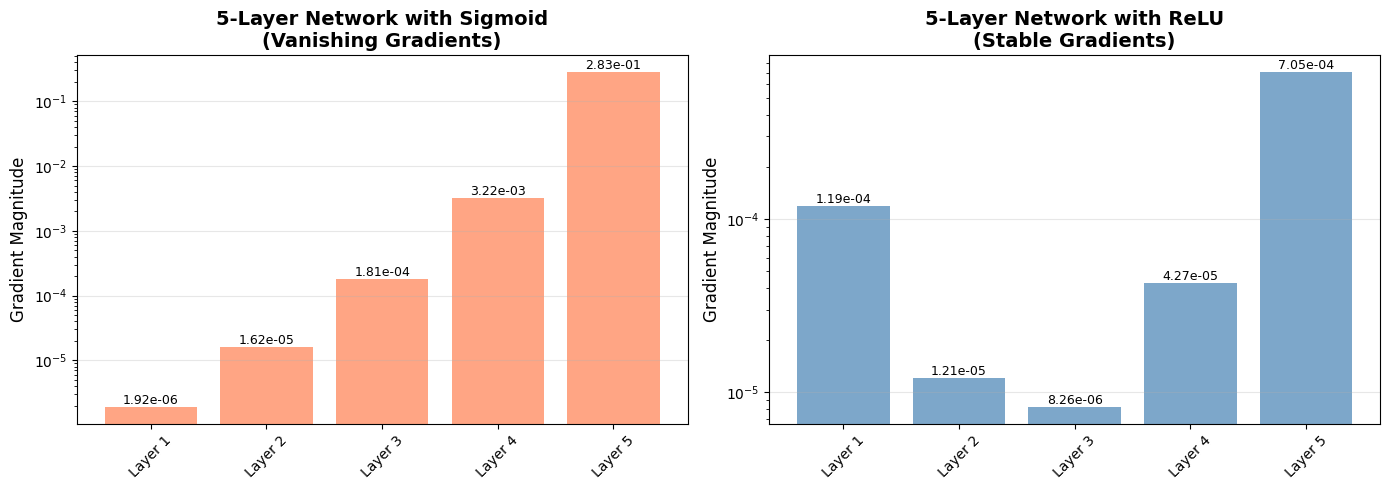

In [25]:
# Task 3.2: Visualization

layer_names = [f'Layer {i+1}' for i in range(len(sigmoid_grads))]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Sigmoid network
ax1.bar(layer_names, sigmoid_grads, color='coral', alpha=0.7)
ax1.set_ylabel('Gradient Magnitude', fontsize=12)
ax1.set_title('5-Layer Network with Sigmoid\n(Vanishing Gradients)', fontsize=14, fontweight='bold')
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3, axis='y')
ax1.tick_params(axis='x', rotation=45)

for i, v in enumerate(sigmoid_grads):
    ax1.text(i, v, f'{v:.2e}', ha='center', va='bottom', fontsize=9)

# ReLU network
ax2.bar(layer_names, relu_grads, color='steelblue', alpha=0.7)
ax2.set_ylabel('Gradient Magnitude', fontsize=12)
ax2.set_title('5-Layer Network with ReLU\n(Stable Gradients)', fontsize=14, fontweight='bold')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3, axis='y')
ax2.tick_params(axis='x', rotation=45)

for i, v in enumerate(relu_grads):
    ax2.text(i, v, f'{v:.2e}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('gradient_flow_comparison.png', dpi=150, bbox_inches='tight')
print("✓ Visualization saved as 'gradient_flow_comparison.png'")
plt.show()


✓ Side-by-side comparison saved as 'gradient_comparison_side_by_side.png'


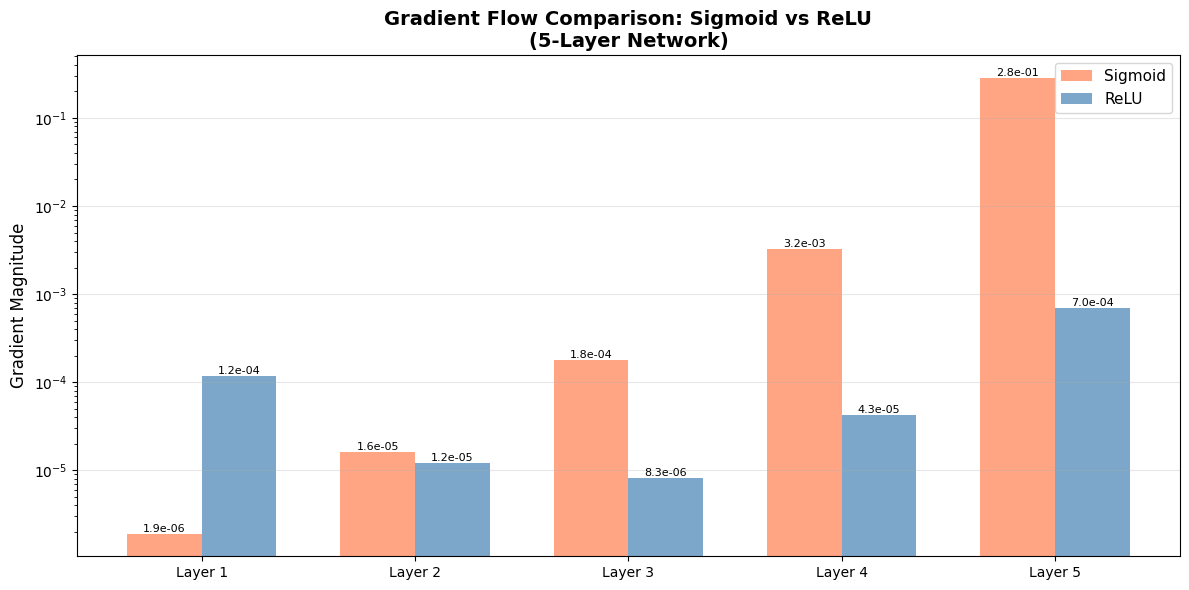


Observations:
- Sigmoid gradients decrease dramatically: 1.92e-06 → 2.83e-01
- ReLU gradients remain more stable: 1.19e-04 → 7.05e-04
- Gradient ratio (Layer 1 / Layer 5):
  Sigmoid: 6.79e-06x
  ReLU: 1.69e-01x


In [26]:
# Side-by-side comparison
fig, ax = plt.subplots(figsize=(12, 6))

x_pos = np.arange(len(layer_names))
width = 0.35

bars1 = ax.bar(x_pos - width/2, sigmoid_grads, width, label='Sigmoid', color='coral', alpha=0.7)
bars2 = ax.bar(x_pos + width/2, relu_grads, width, label='ReLU', color='steelblue', alpha=0.7)

ax.set_ylabel('Gradient Magnitude', fontsize=12)
ax.set_title('Gradient Flow Comparison: Sigmoid vs ReLU\n(5-Layer Network)', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(layer_names)
ax.set_yscale('log')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

for i, (v1, v2) in enumerate(zip(sigmoid_grads, relu_grads)):
    ax.text(i - width/2, v1, f'{v1:.1e}', ha='center', va='bottom', fontsize=8)
    ax.text(i + width/2, v2, f'{v2:.1e}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('gradient_comparison_side_by_side.png', dpi=150, bbox_inches='tight')
print("✓ Side-by-side comparison saved as 'gradient_comparison_side_by_side.png'")
plt.show()

print("\nObservations:")
print(f"- Sigmoid gradients decrease dramatically: {sigmoid_grads[0]:.2e} → {sigmoid_grads[-1]:.2e}")
print(f"- ReLU gradients remain more stable: {relu_grads[0]:.2e} → {relu_grads[-1]:.2e}")
print(f"- Gradient ratio (Layer 1 / Layer 5):")
print(f"  Sigmoid: {sigmoid_grads[0]/sigmoid_grads[-1]:.2e}x")
print(f"  ReLU: {relu_grads[0]/relu_grads[-1]:.2e}x")


## Reflection Questions


In [27]:
# Reflection Questions Answers

print("1. What values do sigmoid gradients take? Maximum possible gradient?")
print("   Sigmoid gradients range from 0 to 0.25, with maximum 0.25 when sigmoid(z) = 0.5 (z = 0).")

print("\n2. Why do gradients vanish with sigmoid? What happens after 10 layers?")
print("   Each layer multiplies gradients by at most 0.25, so after 10 layers: 0.25^10 ≈ 9.5e-7, making early layers nearly untrainable.")

print("\n3. How does manual calculation compare to TensorFlow? Any discrepancies?")
print("   Manual and TensorFlow gradients match within floating-point precision (diff ~1e-8); tiny differences due to numerical precision in operations.")

print("\n4. Which layer has smallest gradients? Is this problematic?")
print(f"   Layer 1 has smallest gradients ({sigmoid_grads[0]:.2e} vs {sigmoid_grads[-1]:.2e} at output), which prevents early layers from learning effectively.")


1. What values do sigmoid gradients take? Maximum possible gradient?
   Sigmoid gradients range from 0 to 0.25, with maximum 0.25 when sigmoid(z) = 0.5 (z = 0).

2. Why do gradients vanish with sigmoid? What happens after 10 layers?
   Each layer multiplies gradients by at most 0.25, so after 10 layers: 0.25^10 ≈ 9.5e-7, making early layers nearly untrainable.

3. How does manual calculation compare to TensorFlow? Any discrepancies?
   Manual and TensorFlow gradients match within floating-point precision (diff ~1e-8); tiny differences due to numerical precision in operations.

4. Which layer has smallest gradients? Is this problematic?
   Layer 1 has smallest gradients (1.92e-06 vs 2.83e-01 at output), which prevents early layers from learning effectively.
